In [1]:
import numpy as np
from math import pi, sqrt, tanh
import matplotlib.pyplot as plt
from quimb import *
import time
from os import path


In [2]:
def Hilbertspace_Zr(N,r):

    states=np.zeros((r**N,N),dtype=int)

    for i_1 in range(r**N):
        num_str=np.base_repr(i_1,base=r)[::-1]
        for i_2 in range(len(num_str)):
            states[i_1,i_2]=int(num_str[i_2])

    return states
# print( np.arange(int(r**(N-1)))  )
# print(states)

def p_transpose_2(V,Na,Nb):
# partial transpose with respect to subsystem 2
# the basis of NaxNb density matrix is defined by Nb*(i-1)+j,
# i,j=1,2,3 spans the Hilbert space of subsystem 1 and 2 respectively
    U=np.zeros((Na*Nb,Na*Nb), dtype=np.complex128)
    for i_1 in range(Na):
        for i_2 in range(Na):
#             print(V[Nb*i_1:Nb*(i_1+1),Nb*i_2:Nb*(i_2+1)].shape)
            U[Nb*i_1:Nb*(i_1+1),Nb*i_2:Nb*(i_2+1)]=np.transpose(V[Nb*i_1:Nb*(i_1+1),Nb*i_2:Nb*(i_2+1)])

    return U


In [5]:
Nrep=1
r=2 # local Hilbert space dim

Lab=8
# Lclist=np.array([4,5,6])
Lclist=np.arange(int(Lab/2),int(Lab/2)+3)

Nab=r**Lab

neg=np.ones((int(Lab/2)+1,len(Lclist),Nrep))
# v1b=np.zeros((Nrep*Nab,int(Lab/2)))

# np.random.seed(1)

for i_c in range(len(Lclist)):
    Lc=Lclist[i_c]
    print('Nc = %d' % (Lc))
    Nc=r**Lc
    t_timer=time.time()
    for i_r in range(Nrep):
        #### no symmetry
        X=np.random.randn(Nab,Nc)+1j*np.random.randn(Nab,Nc)

        mat=np.dot(X,np.matrix(X).H)
        rho= mat / np.trace(mat)

        for i_n in range(int(Lab/2)):
            Na=r**(i_n+1)
            Nb=r**(Lab-i_n-1)
            rT2b = p_transpose_2(rho,Na,Nb)
            l1T=np.linalg.eigvalsh(rT2b)
#             v1b[i_r*Nab:(i_r+1)*Nab,i_n] = (Nab)*l1T
            neg[i_n+1,i_c,i_r]= np.sum(np.abs(l1T))
    
    elapsed = time.time() - t_timer
    print("Finished, elapsed time = %.2f " % (elapsed)+ "sec")

Nc = 4
Finished, elapsed time = 1.08 sec
Nc = 5
Finished, elapsed time = 1.11 sec
Nc = 6
Finished, elapsed time = 1.13 sec


In [14]:
Nrep=1
r=2 # local Hilbert space dim

Lab=10
Lclist=np.array([5,6])
# Lclist=np.arange(int(Lab/2)-2,int(Lab/2)+2)

# neg_q=np.zeros((int(Lab/2)+1,len(Lclist),Nrep))
neg_q = np.zeros((int(Lab/2)+1,Nrep))
MI = np.zeros((int(Lab/2)+1,Nrep))

dims_ab = [r] * Lab

for i_c in range(len(Lclist)):
    Lc=Lclist[i_c]
    print('Nc = %d' % (Lc))
    Nc=r**Lc

    L= Lab+Lc
    dims = [r] * L
    N = prod(dims)

    t_timer=time.time()
    for i_r in range(Nrep):
        psi = rand_ket(N)
        
        for i_n in range(int(Lab/2)):
            La= i_n+1
            Lb= Lab-i_n-1
#             neg_q[i_n+1,i_c,i_r]=negativity_subsys_approx(psi, dims=dims, sysa=np.arange(La), sysb=np.arange(La,Lab))
#             neg_q[i_n+1,i_r] = negativity_subsys_approx(psi, dims=dims, sysa=np.arange(La), sysb=np.arange(La,Lab))
            neg_q[i_n+1,i_r] = logneg_subsys(psi, dims=dims, sysa=np.arange(La), sysb=np.arange(La,Lab))
            MI[i_n+1,i_r] = mutinf_subsys(psi, dims=dims, sysa=np.arange(La), sysb=np.arange(La,Lab))
        
    elapsed = time.time() - t_timer
    print("Finished, quimb elapsed time = %.2f " % (elapsed)+ "sec")

    f1= 'LN_r_%d_NA_%d_NB_%d_2.npz' % (r,Lab,Lc)
    out_dir = 'LN_figs/' 
    fname = out_dir+f1
    np.savez(fname, logneg=neg_q, MI=MI)
# print(neg_q)

Nc = 5
Finished, quimb elapsed time = 0.65 sec
Nc = 6
Finished, quimb elapsed time = 0.71 sec


Averaged over 1 reps
Averaged over 1 reps
Averaged over 1 reps


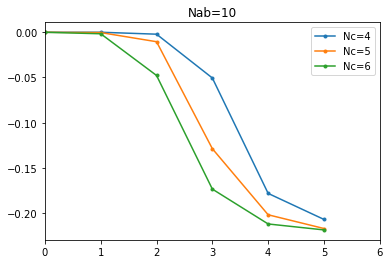

In [15]:
r = 2
Lab = 10

Lclist=np.array([4,5,6])
# Lclist=np.arange(int(Lab/2)-2,int(Lab/2)+2)
out_dir = 'LN_figs/' 

dims_ab = [r] * Lab

def fa(xs):
    ys= np.zeros(xs.shape)
    for i_x in range(len(xs)):
        x= xs[i_x]
        if x>1:
            ys[i_x]= np.real( np.log2(2/pi* np.arcsin(1/x)+2/(3*pi*x)*(1+2*x**2)* (1-1/x**2 +0.0j)**0.5 ) )
        else:
            ys[i_x]= 0
    return ys

at=2*r**((Lab-Lclist)/2)
yt=fa(at)

plt.figure()
# plt.plot([0,Lclist.max()],[0,Lclist.max()],'k--')

for i_c in range(len(Lclist)):
    Lc=Lclist[i_c]
    f1= 'LN_r_%d_NA_%d_NB_%d_2.npz' % (r,Lab,Lc)
    fname = out_dir+f1
    if path.exists(fname):
        npzfile = np.load(fname)
        neg_q=npzfile['logneg']
        MI=npzfile['MI']
        print('Averaged over %d reps' % (np.size(neg_q,1)))

#     logneg_q_avg = np.log2(2*np.mean(neg_q,axis=1)+1)
    logneg_q_avg = np.mean(neg_q,axis=1)
    MI_avg = np.mean(MI,axis=1)

#     plt.plot(np.arange(0,int(Lab)/2+1), logneg_q_avg, '-',color='C%d' % (i_c),label='Nc=%d' % Lc)
    plt.plot(np.arange(0,int(Lab)/2+1), logneg_q_avg-MI_avg/2, '.-',color='C%d' % (i_c),label='Nc=%d' % Lc)
#     if Lc< Lab:
#         plt.plot([0,int(Lab)/2+1],(Lab-Lc)/2*np.array([1,1])+np.log2(8/(3*pi)),'--',color='C%d' % (i_c))

plt.title('Nab=%d' % (Lab))
# plt.ylim(0,4.)
plt.xlim(0,int(Lab)/2+1)
plt.legend()
plt.show()

data file was read
Averaged over 40 reps


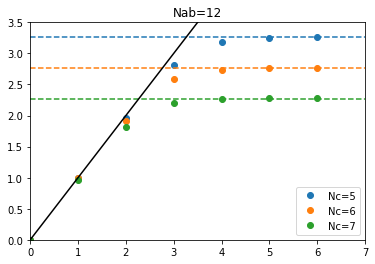

In [12]:
r=2
Lab=12
f1= 'LN_r_%d_NA_%d.npz' % (r,Lab)
out_dir = 'LN_figs/' 
fname = out_dir+f1
if path.exists(fname):
    npzfile = np.load(fname)
    neg_q=npzfile['logneg']
    Lclist=npzfile['Lc_sw']
    print('data file was read')


def fa(xs):
    ys= np.zeros(xs.shape)
    for i_x in range(len(xs)):
        x= xs[i_x]
        if x>1:
            ys[i_x]= np.real( np.log2(2/pi* np.arcsin(1/x)+2/(3*pi*x)*(1+2*x**2)* (1-1/x**2 +0.0j)**0.5 ) )
        else:
            ys[i_x]= 0
    return ys

at=2*r**((Lab-Lclist)/2)
yt=fa(at)

# logneg_avg=np.log2(np.mean(neg,axis=2))
# neglog_avg=np.mean(np.log2(neg),axis=2)
logneg_q_avg=np.log2(2*np.mean(neg_q,axis=2)+1)
print('Averaged over %d reps' % (np.size(neg_q,2)))

plt.figure()
for i_c in range(len(Lclist)):
    Lc=Lclist[i_c]
#     plt.plot(np.arange(0,int(Lab)/2+1), logneg_avg[:,i_c],'ko', markersize=4)# color='C%d' % (i_c),label='Nc=%d' % Lc)
    plt.plot(np.arange(0,int(Lab)/2+1), logneg_q_avg[:,i_c], 'o',color='C%d' % (i_c),label='Nc=%d' % Lc)
    if Lc< Lab:
        plt.plot([0,int(Lab)/2+1],(Lab-Lc)/2*np.array([1,1])+np.log2(8/(3*pi)),'--',color='C%d' % (i_c))
#         plt.plot([0,int(Lab)/2+1],yt[i_c]*np.array([1,1]),'-.',color='C%d' % (i_c))
# plt.plot(np.arange(1,5), neglog_avg, 'x')

plt.title('Nab=%d' % (Lab))
plt.plot([0,Lclist.max()],[0,Lclist.max()],'k')
plt.ylim(0,3.5)
plt.xlim(0,int(Lab)/2+1)
plt.legend()
plt.show()

In [ ]:
def Gz(z,a,b):
    return -((-1 + b)/(3*z)) + ((1 - 1j*sqrt(3))*(3*z*(-z + a) \
           - (-1 + b)^2))/(3*2^(2/3)*z*(2 - 18*z^2 - 9*z*a - 6*b - 9*z^2*b + 9*z a*b + 6*b^2 - 2*b^3 +\      
           (4*(3*z (-z + a) - (-1 + b)^2)^3 + (2 - 18*z^2 - 9*z*a - \     
            6*b - 9*z^2*b + 9*z*a*b + 6*b^2 - 2*b^3)^2)**0.5)^(1/3)) -  1/(6*2^(1/3)*z)\
            (1 + 1j*sqrt(3))*(2 - 18*z^2 - 9*z*a - 6*b - 9*z^2*b +  9*z*a*b + 6*b^2 - 2*b^3 +( 4*(3*z*(-z + a) -\
             (-1 + b)^2)^3 + (2 - 18*z^2 - 9*z*a - 6*b - 9*z^2*b + 9*z*a*b + 6*b^2 - 2*b^3)^2)**0.5)^(1/3)

